In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [7]:
from sklearn.cross_decomposition import CCA

# indexing workflow:
- for each correlated enhancer, use fangming's indexes to get the corresponding gene name
- my enhancer index matches fangming's

# difficult part is getting promoter kmers

# Import kmers

In [52]:
DIR = '/cndd2/ethan/projects/enh_gene_linkage/enhancer_sequence'
OUTDIR = '/cndd2/fangming/projects/scf_enhancers/results'

In [11]:
kmer_nums = [2, 3, 4, 5]

enhancer_kmer_list =[]
promoter_kmer_list = []
data_path_enh = os.path.join(DIR, 'data/enhancers_chromsort_kmer_{}_bases_1000.tsv')
data_path_prom = os.path.join(DIR, 'data/promoter_sort_kmer_{}_bases_1000.tsv')

for k in kmer_nums:
    en = pd.read_csv(data_path_enh.format(k), sep='\t').set_index('0')
    prom = pd.read_csv(data_path_prom.format(k), sep='\t').set_index('0')
    enhancer_kmer_list.append(en)
    promoter_kmer_list.append(prom)
    

In [12]:
enhancer_kmers = pd.concat(enhancer_kmer_list, axis=1)
promoter_kmers = pd.concat(promoter_kmer_list, axis=1)

In [13]:
enhancer_kmers.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,,,,,,,,,,,,,,,,,,,,,
>chr10:100009350-100011350,335,246,281,131,327,194,37,281,225,105,...,1.0,5.0,6.0,11.0,5.0,7.0,7.0,6.0,9.0,19.0
>chr10:100018062-100020062,447,208,269,141,280,193,26,269,231,80,...,1.0,13.0,10.0,7.0,6.0,12.0,17.0,12.0,9.0,46.0
>chr10:100018734-100020734,404,229,300,116,284,189,31,300,247,85,...,2.0,13.0,6.0,4.0,8.0,12.0,13.0,9.0,5.0,44.0
>chr10:100019262-100021262,419,232,289,107,289,205,31,289,242,83,...,3.0,11.0,6.0,5.0,10.0,21.0,8.0,10.0,13.0,34.0
>chr10:100021578-100023578,275,236,323,96,339,265,23,323,250,111,...,1.0,9.0,4.0,9.0,3.0,10.0,2.0,7.0,9.0,7.0


In [14]:
promoter_kmers.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,,,,,,,,,,,,,,,,,,,,,
>chr10:100014631-100016631,303.0,187.0,288.0,72.0,247.0,329.0,107.0,288.0,233.0,164.0,...,1.0,16.0,3.0,4.0,5.0,4.0,7.0,18.0,8.0,24.0
>chr10:100334677-100336677,323.0,202.0,331.0,119.0,340.0,201.0,17.0,331.0,247.0,128.0,...,0.0,3.0,10.0,7.0,4.0,11.0,13.0,4.0,9.0,12.0
>chr10:100339837-100341837,320.0,201.0,328.0,122.0,342.0,201.0,18.0,328.0,242.0,131.0,...,0.0,3.0,10.0,6.0,4.0,11.0,13.0,4.0,10.0,12.0
>chr10:100344973-100346973,333.0,207.0,324.0,119.0,329.0,205.0,20.0,324.0,246.0,120.0,...,0.0,4.0,11.0,6.0,4.0,10.0,12.0,5.0,12.0,12.0
>chr10:100350094-100352094,333.0,207.0,324.0,119.0,329.0,205.0,20.0,324.0,246.0,120.0,...,0.0,4.0,11.0,6.0,4.0,10.0,12.0,5.0,12.0,12.0


# import genes

In [15]:
ref_path =  '/cndd2/ethan/projects/scf_paper/modeling/working_data/promoter/mm10_promoter{}.{}'
genes=pd.read_csv(ref_path.format('', 'bed'), sep='\t', header=None)

In [16]:
enhs_list = pd.read_csv('/cndd2/ethan/projects/enh_gene_linkage/enhancer_sequence/data/enhancers_chromsort_center_1000.bed', sep='\t', header=None)

In [17]:
genes['kmer_format'] = '>' +  genes[0] + ':' + genes[1].astype(str) + '-' + genes[2].astype(str) + '\n'

In [18]:
enhs_list['kmer_format'] = '>' +  enhs_list[0] + ':' + enhs_list[1].astype(str) + '-' + enhs_list[2].astype(str)

# get sig pairs

In [19]:
import pickle
sig_pairs = pickle.load(open('/cndd2/ethan/projects/enh_gene_linkage/epigenetic_uncorrelation/sig_pairs.pkl', 'rb'))

In [20]:
mcg = sig_pairs['mCG']
atac= sig_pairs['Open Chromatin']

In [21]:
gene_mcg = []
enh_mcg = []
for i in mcg:
    tmp = i.split(':')
    gene_mcg.append(tmp[0])
    enh_mcg.append(tmp[1])

In [22]:
enhs_list.head()

,0,1,2,3,kmer_format
0,chr1,3082793,3084793,NaN,>chr1:3082793-3084793
1,chr1,3111351,3113351,NaN,>chr1:3111351-3113351
2,chr1,3111878,3113878,NaN,>chr1:3111878-3113878
3,chr1,3112876,3114876,NaN,>chr1:3112876-3114876
4,chr1,3117863,3119863,NaN,>chr1:3117863-3119863


In [23]:
use_enhs = enhs_list.loc[np.array(enh_mcg).astype(int)]

In [24]:
use_enhs.shape

(10696, 5)

In [25]:
use_enhs.head()

,0,1,2,3,kmer_format
72066,chr14,69847359,69849359,NaN,>chr14:69847359-69849359
97748,chr17,10364382,10366382,NaN,>chr17:10364382-10366382
186895,chr6,73053502,73055502,NaN,>chr6:73053502-73055502
100264,chr17,47865357,47867357,NaN,>chr17:47865357-47867357
196198,chr7,45193674,45195674,NaN,>chr7:45193674-45195674


In [26]:
use_enhs['paired_gene'] = gene_mcg

In [27]:
use_enhs.head()

,0,1,2,3,kmer_format,paired_gene
72066,chr14,69847359,69849359,NaN,>chr14:69847359-69849359,ENSMUSG00000003469
97748,chr17,10364382,10366382,NaN,>chr17:10364382-10366382,ENSMUSG00000062078
186895,chr6,73053502,73055502,NaN,>chr6:73053502-73055502,ENSMUSG00000079523
100264,chr17,47865357,47867357,NaN,>chr17:47865357-47867357,ENSMUSG00000023991
196198,chr7,45193674,45195674,NaN,>chr7:45193674-45195674,ENSMUSG00000030792


In [28]:
my_gene_list = pd.read_csv('/cndd2/ethan/projects/enh_gene_linkage/enhancer_sequence/data/promoter_sort_center_1000.bed', sep='\t', header=None)

In [29]:
my_gene_list.head()

,0,1,2,3,4
0,chr1,3670499,3672499,ENSMUSG00000051951.5,Xkr4
1,chr1,4408242,4410242,ENSMUSG00000025900.12,Rp1
2,chr1,4496355,4498355,ENSMUSG00000025902.13,Sox17
3,chr1,4784740,4786740,ENSMUSG00000033845.13,Mrpl15
4,chr1,4806789,4808789,ENSMUSG00000025903.14,Lypla1


In [30]:
my_gene_list[3] = [i.split('.')[0] for i in my_gene_list[3]]

In [31]:
genes = my_gene_list

In [32]:
genes['kmer_format'] = '>' +  genes[0] + ':' + genes[1].astype(str) + '-' + genes[2].astype(str)

In [33]:
use_genes = genes.loc[genes['kmer_format'].isin(promoter_kmers.index)]

In [34]:
use_genes = use_genes.set_index('kmer_format').loc[promoter_kmers.index]

In [35]:
use_genes.head()

,0,1,2,3,4
kmer_format,,,,,
>chr10:100014631-100016631,chr10,100014631,100016631,ENSMUSG00000019966,Kitl
>chr10:100334677-100336677,chr10,100334677,100336677,ENSMUSG00000094314,Gm4301
>chr10:100339837-100341837,chr10,100339837,100341837,ENSMUSG00000091101,Gm4302
>chr10:100344973-100346973,chr10,100344973,100346973,ENSMUSG00000112931,Gm4303
>chr10:100350094-100352094,chr10,100350094,100352094,ENSMUSG00000112856,Gm4305


In [36]:
use_genes.shape

(21767, 5)

In [37]:
promoter_kmers.shape

(21755, 1360)

In [38]:
np.sum(use_genes.index.isin(promoter_kmers.index))

21767

In [39]:
use_genes = use_genes[~use_genes.index.duplicated()]

In [40]:
promoter_kmers['gene'] = use_genes[3].values

In [41]:
promoter_kmers.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT,gene
0,,,,,,,,,,,,,,,,,,,,,
>chr10:100014631-100016631,303.0,187.0,288.0,72.0,247.0,329.0,107.0,288.0,233.0,164.0,...,16.0,3.0,4.0,5.0,4.0,7.0,18.0,8.0,24.0,ENSMUSG00000019966
>chr10:100334677-100336677,323.0,202.0,331.0,119.0,340.0,201.0,17.0,331.0,247.0,128.0,...,3.0,10.0,7.0,4.0,11.0,13.0,4.0,9.0,12.0,ENSMUSG00000094314
>chr10:100339837-100341837,320.0,201.0,328.0,122.0,342.0,201.0,18.0,328.0,242.0,131.0,...,3.0,10.0,6.0,4.0,11.0,13.0,4.0,10.0,12.0,ENSMUSG00000091101
>chr10:100344973-100346973,333.0,207.0,324.0,119.0,329.0,205.0,20.0,324.0,246.0,120.0,...,4.0,11.0,6.0,4.0,10.0,12.0,5.0,12.0,12.0,ENSMUSG00000112931
>chr10:100350094-100352094,333.0,207.0,324.0,119.0,329.0,205.0,20.0,324.0,246.0,120.0,...,4.0,11.0,6.0,4.0,10.0,12.0,5.0,12.0,12.0,ENSMUSG00000112856


In [42]:
enhancer_kmers.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,,,,,,,,,,,,,,,,,,,,,
>chr10:100009350-100011350,335,246,281,131,327,194,37,281,225,105,...,1.0,5.0,6.0,11.0,5.0,7.0,7.0,6.0,9.0,19.0
>chr10:100018062-100020062,447,208,269,141,280,193,26,269,231,80,...,1.0,13.0,10.0,7.0,6.0,12.0,17.0,12.0,9.0,46.0
>chr10:100018734-100020734,404,229,300,116,284,189,31,300,247,85,...,2.0,13.0,6.0,4.0,8.0,12.0,13.0,9.0,5.0,44.0
>chr10:100019262-100021262,419,232,289,107,289,205,31,289,242,83,...,3.0,11.0,6.0,5.0,10.0,21.0,8.0,10.0,13.0,34.0
>chr10:100021578-100023578,275,236,323,96,339,265,23,323,250,111,...,1.0,9.0,4.0,9.0,3.0,10.0,2.0,7.0,9.0,7.0


In [43]:
use_enhs.head()

,0,1,2,3,kmer_format,paired_gene
72066,chr14,69847359,69849359,NaN,>chr14:69847359-69849359,ENSMUSG00000003469
97748,chr17,10364382,10366382,NaN,>chr17:10364382-10366382,ENSMUSG00000062078
186895,chr6,73053502,73055502,NaN,>chr6:73053502-73055502,ENSMUSG00000079523
100264,chr17,47865357,47867357,NaN,>chr17:47865357-47867357,ENSMUSG00000023991
196198,chr7,45193674,45195674,NaN,>chr7:45193674-45195674,ENSMUSG00000030792


In [44]:
use_kmer_enhs = enhancer_kmers.loc[use_enhs.kmer_format]

In [45]:
use_kmer_enhs.shape

(10696, 1360)

In [46]:
use_enhs.shape

(10696, 6)

In [47]:
use_kmer_enhs['paired_gene'] = use_enhs['paired_gene'].values

In [48]:
use_kmer_enhs.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT,paired_gene
0,,,,,,,,,,,,,,,,,,,,,
>chr14:69847359-69849359,254,203,326,84,299,355,34,326,254,118,...,12.0,1.0,6.0,6.0,7.0,3.0,7.0,7.0,8.0,ENSMUSG00000003469
>chr17:10364382-10366382,297,207,299,102,294,343,28,299,227,107,...,7.0,6.0,5.0,4.0,5.0,6.0,10.0,5.0,11.0,ENSMUSG00000062078
>chr6:73053502-73055502,322,226,285,131,327,233,30,285,243,101,...,6.0,5.0,5.0,2.0,6.0,13.0,3.0,7.0,26.0,ENSMUSG00000079523
>chr17:47865357-47867357,224,219,329,89,321,340,30,329,238,126,...,8.0,2.0,6.0,4.0,10.0,2.0,2.0,7.0,7.0,ENSMUSG00000023991
>chr7:45193674-45195674,183,206,387,51,298,383,27,387,254,139,...,7.0,2.0,3.0,5.0,7.0,1.0,3.0,4.0,3.0,ENSMUSG00000030792


In [53]:
f = os.path.join(OUTDIR, 'enhancer_kmers_concat_2kb.tsv')
use_kmer_enhs.to_csv(f, sep='\t')

In [54]:
promoter_kmers = promoter_kmers.set_index('gene')

In [55]:
gene_pairs = promoter_kmers.loc[use_kmer_enhs.paired_gene]

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [56]:
use_promoter_kmers = []
missing_genes = []
for i in use_kmer_enhs.paired_gene:
    if i in promoter_kmers.index.tolist():
        use_promoter_kmers.append(promoter_kmers.loc[i])
    else: 
        missing_genes.append(i)

In [57]:
len(missing_genes)

678

In [58]:
use_kmer_enhs = use_kmer_enhs.loc[~(use_kmer_enhs.paired_gene.isin(missing_genes))]

In [59]:
use_promoter_kmers= np.array(use_promoter_kmers)
use_promoter_kmers.shape

(10018, 1360)

In [60]:
print(use_kmer_enhs.shape)
use_kmer_enhs.head()

(10018, 1361)


,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT,paired_gene
0,,,,,,,,,,,,,,,,,,,,,
>chr14:69847359-69849359,254,203,326,84,299,355,34,326,254,118,...,12.0,1.0,6.0,6.0,7.0,3.0,7.0,7.0,8.0,ENSMUSG00000003469
>chr17:10364382-10366382,297,207,299,102,294,343,28,299,227,107,...,7.0,6.0,5.0,4.0,5.0,6.0,10.0,5.0,11.0,ENSMUSG00000062078
>chr6:73053502-73055502,322,226,285,131,327,233,30,285,243,101,...,6.0,5.0,5.0,2.0,6.0,13.0,3.0,7.0,26.0,ENSMUSG00000079523
>chr17:47865357-47867357,224,219,329,89,321,340,30,329,238,126,...,8.0,2.0,6.0,4.0,10.0,2.0,2.0,7.0,7.0,ENSMUSG00000023991
>chr7:45193674-45195674,183,206,387,51,298,383,27,387,254,139,...,7.0,2.0,3.0,5.0,7.0,1.0,3.0,4.0,3.0,ENSMUSG00000030792


In [61]:
use_kmer_enhs.shape

(10018, 1361)

In [62]:
use_enhs.head()

,0,1,2,3,kmer_format,paired_gene
72066,chr14,69847359,69849359,NaN,>chr14:69847359-69849359,ENSMUSG00000003469
97748,chr17,10364382,10366382,NaN,>chr17:10364382-10366382,ENSMUSG00000062078
186895,chr6,73053502,73055502,NaN,>chr6:73053502-73055502,ENSMUSG00000079523
100264,chr17,47865357,47867357,NaN,>chr17:47865357-47867357,ENSMUSG00000023991
196198,chr7,45193674,45195674,NaN,>chr7:45193674-45195674,ENSMUSG00000030792


In [63]:
use_enhs.shape

(10696, 6)

In [64]:
tmp_kmer_enhs = enhancer_kmers.loc[use_enhs.kmer_format]

In [65]:
tmp_kmer_enhs['paired_gene'] = use_enhs.paired_gene.values

In [66]:
tmp_kmer_enhs.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT,paired_gene
0,,,,,,,,,,,,,,,,,,,,,
>chr14:69847359-69849359,254,203,326,84,299,355,34,326,254,118,...,12.0,1.0,6.0,6.0,7.0,3.0,7.0,7.0,8.0,ENSMUSG00000003469
>chr17:10364382-10366382,297,207,299,102,294,343,28,299,227,107,...,7.0,6.0,5.0,4.0,5.0,6.0,10.0,5.0,11.0,ENSMUSG00000062078
>chr6:73053502-73055502,322,226,285,131,327,233,30,285,243,101,...,6.0,5.0,5.0,2.0,6.0,13.0,3.0,7.0,26.0,ENSMUSG00000079523
>chr17:47865357-47867357,224,219,329,89,321,340,30,329,238,126,...,8.0,2.0,6.0,4.0,10.0,2.0,2.0,7.0,7.0,ENSMUSG00000023991
>chr7:45193674-45195674,183,206,387,51,298,383,27,387,254,139,...,7.0,2.0,3.0,5.0,7.0,1.0,3.0,4.0,3.0,ENSMUSG00000030792


In [67]:
tmp_kmer_enhs.shape

(10696, 1361)

In [68]:
f = os.path.join(OUTDIR, 'enhancer_kmers_concat.tsv')
tmp_kmer_enhs.to_csv(f, sep='\t')

# try CCA

In [69]:
cca = CCA()

In [70]:
enh, promoter = cca.fit_transform(use_kmer_enhs.drop('paired_gene', axis=1).values, use_promoter_kmers)

In [71]:
import matplotlib.pyplot as plt

Text(0.5,1,'second cannonical component')

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


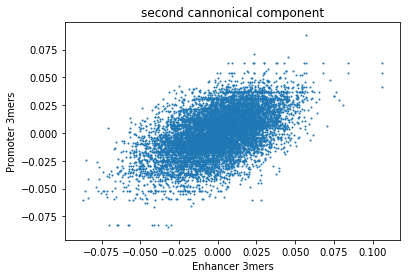

In [72]:
plt.scatter(enh[:, 1], promoter[:, 1], s= 1)
plt.xlabel('Enhancer 3mers')
plt.ylabel('Promoter 3mers')
plt.title('second cannonical component')

In [73]:
cca.get_params()

{'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}

In [74]:
#cca.score(use_kmer_enhs.drop('paired_gene', axis=1).values, use_promoter_kmers)

Text(0.5,1,'First cannonical component')

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


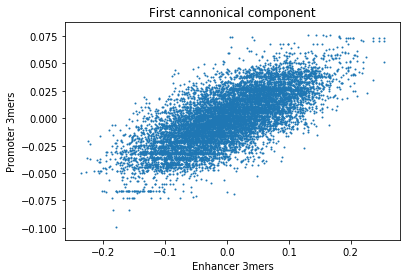

In [75]:
plt.scatter(enh[:, 0], promoter[:, 0], s =1)
plt.xlabel('Enhancer 3mers')
plt.ylabel('Promoter 3mers')
plt.title('First cannonical component')

In [76]:
from scipy.stats import spearmanr

In [77]:
spearmanr(enh[:, 1], promoter[:, 1])

SpearmanrResult(correlation=0.51896001857630536, pvalue=0.0)

In [78]:
spearmanr(enh[:, 0], promoter[:, 0])

SpearmanrResult(correlation=0.71919149096402235, pvalue=0.0)

# get cannonical loadings

In [79]:
use_enh_array = use_kmer_enhs.drop('paired_gene', axis=1).values
kmer_names = use_kmer_enhs.columns.to_list()[:-1]
promoter_loadings = []
enhancer_loadings = []
for i in range(use_enh_array.shape[1]):
    enhancer_loadings.append(spearmanr(use_enh_array[:, i], enh[:, 0])[0])
    promoter_loadings.append(spearmanr(use_promoter_kmers[:, i], promoter[:, 0])[0])


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


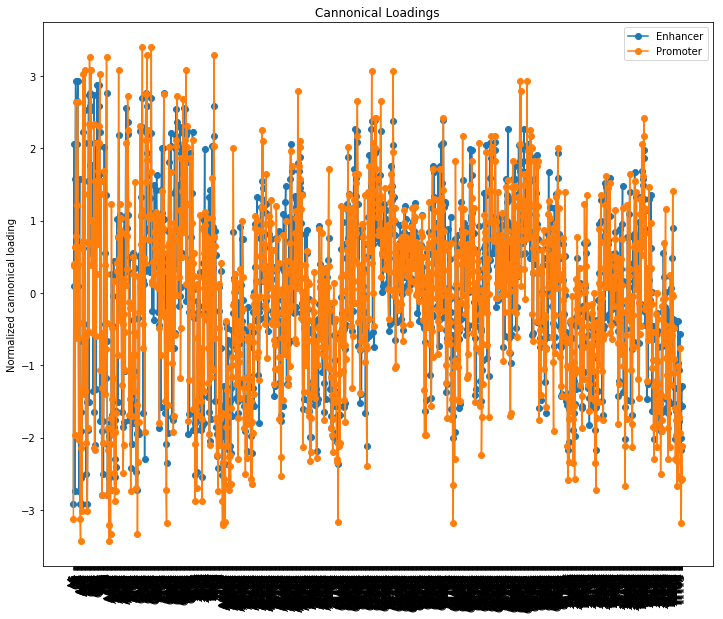

In [80]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(np.arange(len(kmer_names)), enhancer_loadings/np.mean(np.abs(enhancer_loadings)), '-o', label='Enhancer')
ax.plot(np.arange(len(kmer_names)), promoter_loadings/np.mean(np.abs(promoter_loadings)), '-o', label='Promoter')

ax.set_xticks(np.arange(len(kmer_names)))
ax.set_xticklabels(kmer_names, rotation=90)
ax.set_ylabel('Normalized cannonical loading')

ax.set_title('Cannonical Loadings')
ax.legend()

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


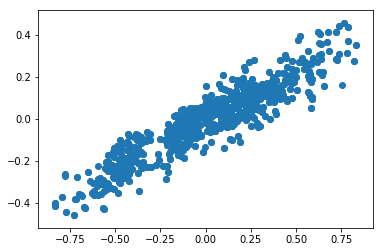

In [81]:
plt.scatter(enhancer_loadings, promoter_loadings)

In [82]:
spearmanr(enhancer_loadings, promoter_loadings)

SpearmanrResult(correlation=0.91931204278619472, pvalue=0.0)

# get top 10 motifs for each type

In [83]:
top_n = 30
tmp_enh = enhancer_loadings
tmp_prom = promoter_loadings
enh_motif = []
prom_motif = []
for i in range(top_n):
    prom_max = np.argmax(np.abs(tmp_prom)) 
    enh_max = np.argmax(np.abs(tmp_enh))
    enh_motif.append(kmer_names[enh_max])
    prom_motif.append(kmer_names[prom_max])
    tmp_enh[enh_max] = 0
    tmp_prom[prom_max] = 0
    

In [84]:
enh_motif

['CC',
 'GG',
 'AA',
 'TT',
 'AAT',
 'ATT',
 'GCC',
 'GGC',
 'TAA',
 'TTA',
 'CCAG',
 'CTGG',
 'CCA',
 'TGG',
 'CAG',
 'CTG',
 'TA',
 'AT',
 'AAAT',
 'ATTT',
 'CAGG',
 'CCTG',
 'GC',
 'CCC',
 'GGG',
 'CCCA',
 'TGGG',
 'AAA',
 'TTT',
 'AGCC']

In [85]:
prom_motif

['AAA',
 'TTT',
 'CAGG',
 'CCTG',
 'AAAT',
 'ATTT',
 'CCCA',
 'TGGG',
 'CCA',
 'TGG',
 'AAAA',
 'TTTT',
 'GAAAA',
 'TTTTC',
 'GAAA',
 'TTTC',
 'AAAAT',
 'ATTTT',
 'AA',
 'TT',
 'ACCC',
 'GGGT',
 'AGG',
 'CCT',
 'CCAGG',
 'CCTGG',
 'ACC',
 'GGT',
 'AAT',
 'ATT']

# shuffle control

In [86]:
promoter_kmers.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
gene,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000019966,303.0,187.0,288.0,72.0,247.0,329.0,107.0,288.0,233.0,164.0,...,1.0,16.0,3.0,4.0,5.0,4.0,7.0,18.0,8.0,24.0
ENSMUSG00000094314,323.0,202.0,331.0,119.0,340.0,201.0,17.0,331.0,247.0,128.0,...,0.0,3.0,10.0,7.0,4.0,11.0,13.0,4.0,9.0,12.0
ENSMUSG00000091101,320.0,201.0,328.0,122.0,342.0,201.0,18.0,328.0,242.0,131.0,...,0.0,3.0,10.0,6.0,4.0,11.0,13.0,4.0,10.0,12.0
ENSMUSG00000112931,333.0,207.0,324.0,119.0,329.0,205.0,20.0,324.0,246.0,120.0,...,0.0,4.0,11.0,6.0,4.0,10.0,12.0,5.0,12.0,12.0
ENSMUSG00000112856,333.0,207.0,324.0,119.0,329.0,205.0,20.0,324.0,246.0,120.0,...,0.0,4.0,11.0,6.0,4.0,10.0,12.0,5.0,12.0,12.0


In [87]:
enhancer_kmers.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,,,,,,,,,,,,,,,,,,,,,
>chr10:100009350-100011350,335,246,281,131,327,194,37,281,225,105,...,1.0,5.0,6.0,11.0,5.0,7.0,7.0,6.0,9.0,19.0
>chr10:100018062-100020062,447,208,269,141,280,193,26,269,231,80,...,1.0,13.0,10.0,7.0,6.0,12.0,17.0,12.0,9.0,46.0
>chr10:100018734-100020734,404,229,300,116,284,189,31,300,247,85,...,2.0,13.0,6.0,4.0,8.0,12.0,13.0,9.0,5.0,44.0
>chr10:100019262-100021262,419,232,289,107,289,205,31,289,242,83,...,3.0,11.0,6.0,5.0,10.0,21.0,8.0,10.0,13.0,34.0
>chr10:100021578-100023578,275,236,323,96,339,265,23,323,250,111,...,1.0,9.0,4.0,9.0,3.0,10.0,2.0,7.0,9.0,7.0


# sampling

In [88]:
num_samplings = 10
sample_pairs = []
for i in range(num_samplings):
    enh_idx = np.random.randint(0, enhancer_kmers.shape[0], size = 10000)
    prom_idx = np.random.randint(0, promoter_kmers.shape[1], size = 10000)
    
    sample_pairs.append((enh_idx, prom_idx))

In [89]:
shuffle_cca = CCA()

In [90]:
sample_pairs[0]

(array([217439,   6787,  75154, ..., 146673,  96335,  42306]),
 array([  37,   32,  842, ..., 1117,  309,  593]))

In [91]:
enhancer_kmers.values.shape

(233524, 1360)

In [92]:
enhancer_kmers.values[enh_idx, :]

array([[ 211.,  236.,  314., ...,    3.,    2.,    5.],
       [ 367.,  217.,  285., ...,   10.,    9.,   12.],
       [ 422.,  202.,  290., ...,    7.,    9.,   28.],
       ..., 
       [ 331.,  211.,  314., ...,    8.,    4.,   20.],
       [ 335.,  187.,  322., ...,   16.,    7.,   32.],
       [ 253.,  255.,  331., ...,    8.,    2.,    3.]])

In [93]:
cca1_r = []
cca2_r = []
for i in sample_pairs:
    enh_idx = i[0]
    prom_idx = i[1]
    x, y = shuffle_cca.fit_transform(enhancer_kmers.values[enh_idx, :], promoter_kmers.values[prom_idx, :])
    cca1_r.append(spearmanr(x[:, 0], y[:, 0])[0])
    cca2_r.append(spearmanr(x[:, 1], y[:, 1])[0])

In [94]:
print(cca1_r)

[0.46344075097905435, 0.46446609509443321, 0.45575659723716588, 0.47068637602769076, 0.46287924316965823, 0.46143759394341322, 0.46420347674206408, 0.47370985322641107, 0.47249233522861034, 0.46811833993240537]


In [95]:
print(cca2_r)

[0.45938250260831121, 0.45031784285713317, 0.46358360383575337, 0.46360168320330719, 0.45808355793194566, 0.45297351487869941, 0.45707559155777094, 0.45903535595386336, 0.46336022236746299, 0.45895731274499613]


In [96]:
np.mean(cca1_r), np.mean(cca2_r)

(0.46571906615809067, 0.45863711879392433)

# try against pairs within a megabase

- use fangmings to_evals which represents all pairs in a megabase
- draw random pairs from it

In [97]:
f = '/cndd2/ethan/projects/enh_gene_linkage/non-inear-activation/get_best_gene_in_1mb/evals_in_mb.tsv'
pairs_in_mb = pd.read_csv(f, sep='\t')

In [98]:
pairs_in_mb.head()

,Unnamed: 0,gene,ens,dist,val,val2
0,0,ENSMUSG00000000001,147520,995118,-0.157895,0.144327
1,1,ENSMUSG00000000001,147522,985740,0.027465,-0.322245
2,2,ENSMUSG00000000001,147523,983725,-0.040376,0.086333
3,3,ENSMUSG00000000001,147527,970444,-0.070795,0.144108
4,4,ENSMUSG00000000001,147528,969372,0.012583,0.150892


In [99]:
shuffle_cca = CCA()

In [100]:
num_samplings = 5
sample_ids = []
for i in range(num_samplings):
    sample = np.random.choice(np.arange(pairs_in_mb.shape[0]), size =20000, replace=False)
    sample_ids.append(sample)

In [101]:
cca1_r = []
cca2_r = []
for sample in sample_ids:
    sample_pairs = pairs_in_mb.loc[sample]
    sample_genes = sample_pairs.gene
    sample_ens_id = sample_pairs.ens
    sample_ens = enhs_list.loc[sample_ens_id]
    sample_promoters = genes.set_index(3).loc[sample_genes]
    sample_ens = sample_ens.drop(3, axis=1)
    bad_ix = sample_promoters.isna().sum(axis=1) > 0
    sample_promoters = sample_promoters.loc[~bad_ix.values]
    sample_ens = sample_ens.loc[~bad_ix.values]
    sample_promoter_kmers = promoter_kmers.loc[sample_promoters.index.values]
    sample_enhancer_kmers = enhancer_kmers.loc[sample_ens.kmer_format.values]
    bad = sample_promoter_kmers.isna().sum(axis=1)> 0
    sample_promoter_kmers = sample_promoter_kmers.loc[~bad.values]
    sample_enhancer_kmers = sample_enhancer_kmers.loc[~bad.values]
    x, y = shuffle_cca.fit_transform(sample_enhancer_kmers.values, sample_promoter_kmers.values)
    cca1_r.append(spearmanr(x[:, 0], y[:, 0])[0])
    cca2_r.append(spearmanr(x[:, 1], y[:, 1])[0])

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]
/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:77: UserWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached')


In [102]:
cca1_r

[0.49819003589429584,
 0.50456643524888234,
 0.49205508746982973,
 0.50847400231495954,
 0.50088035089405558]

In [103]:
cca2_r

[0.3689131054018368,
 0.36813829010929611,
 0.37373239895458682,
 0.36580522977486674,
 0.2509560594833265]

In [104]:
np.mean(cca1_r)

0.50083318236440466

In [105]:
np.mean(cca2_r)

0.34550901674478263

# are the features learned different than random features

In [106]:
num_samplings = 10
sample_pairs = []
for i in range(num_samplings):
    enh_idx = np.random.randint(0, enhancer_kmers.shape[0], size = 10000)
    prom_idx = np.random.randint(0, promoter_kmers.shape[1], size = 10000)
    
    sample_pairs.append((enh_idx, prom_idx))

In [107]:
cca1_r = []
cca2_r = []
for i in sample_pairs:
    enh_idx = i[0]
    prom_idx = i[1]
    x, y = cca.transform(enhancer_kmers.values[enh_idx, :], promoter_kmers.values[prom_idx, :])
    cca1_r.append(spearmanr(x[:, 0], y[:, 0])[0])
    cca2_r.append(spearmanr(x[:, 1], y[:, 1])[0])

In [108]:
cca1_r

[0.013661906478437557,
 -0.014718728972617581,
 -0.0058717517485358008,
 -0.009973891287435855,
 0.0193170074382541,
 -0.0031416744959227101,
 -0.0040444713873641416,
 0.0074362627707210086,
 -0.0059666082195147649,
 -0.020888253401253512]

In [109]:
cca2_r

[0.0094054390590473467,
 0.0051133327760619586,
 0.0047962248714542733,
 0.006751490570206191,
 0.0043018391541461594,
 -0.011960712111719661,
 0.0080663246616163049,
 -0.0053035415060757735,
 -0.0094621155055821058,
 0.0021623845114546198]

In [110]:
np.mean(cca1_r)

-0.0024190202825231698

In [111]:
np.mean(cca2_r)

0.0013870666480609313

In [112]:
cca1_r = []
cca2_r = []
for sample in sample_ids:
    sample_pairs = pairs_in_mb.loc[sample]
    sample_genes = sample_pairs.gene
    sample_ens_id = sample_pairs.ens
    sample_ens = enhs_list.loc[sample_ens_id]
    sample_promoters = genes.set_index(3).loc[sample_genes]
    sample_ens = sample_ens.drop(3, axis=1)
    bad_ix = sample_promoters.isna().sum(axis=1) > 0
    sample_promoters = sample_promoters.loc[~bad_ix.values]
    sample_ens = sample_ens.loc[~bad_ix.values]
    sample_promoter_kmers = promoter_kmers.loc[sample_promoters.index.values]
    sample_enhancer_kmers = enhancer_kmers.loc[sample_ens.kmer_format.values]
    bad = sample_promoter_kmers.isna().sum(axis=1)> 0
    sample_promoter_kmers = sample_promoter_kmers.loc[~bad.values]
    sample_enhancer_kmers = sample_enhancer_kmers.loc[~bad.values]
    x, y = cca.transform(sample_enhancer_kmers.values, sample_promoter_kmers.values)
    cca1_r.append(spearmanr(x[:, 0], y[:, 0])[0])
    cca2_r.append(spearmanr(x[:, 1], y[:, 1])[0])

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


In [113]:
cca1_r

[0.26587022112801045,
 0.27134484133464343,
 0.27062859287982222,
 0.2698473561169758,
 0.2614623317345367]

In [114]:
cca2_r

[0.039800961607995226,
 0.027910145013987055,
 0.018980106546797094,
 0.03412152206001768,
 0.019970642517165682]

In [115]:
np.mean(cca1_r)

0.26783066863879779

In [116]:
np.mean(cca2_r)

0.028156675549192545

# validate model on correlated from atac

In [117]:
gene_atac = []
enh_atac = []
for i in atac:
    tmp = i.split(':')
    gene_atac.append(tmp[0])
    enh_atac.append(tmp[1])

In [118]:
atac_enhs = enhs_list.loc[np.array(enh_atac).astype(int)]

In [119]:
atac_enhs['paired_gene'] = gene_atac

In [120]:
enhancer_kmers.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,,,,,,,,,,,,,,,,,,,,,
>chr10:100009350-100011350,335,246,281,131,327,194,37,281,225,105,...,1.0,5.0,6.0,11.0,5.0,7.0,7.0,6.0,9.0,19.0
>chr10:100018062-100020062,447,208,269,141,280,193,26,269,231,80,...,1.0,13.0,10.0,7.0,6.0,12.0,17.0,12.0,9.0,46.0
>chr10:100018734-100020734,404,229,300,116,284,189,31,300,247,85,...,2.0,13.0,6.0,4.0,8.0,12.0,13.0,9.0,5.0,44.0
>chr10:100019262-100021262,419,232,289,107,289,205,31,289,242,83,...,3.0,11.0,6.0,5.0,10.0,21.0,8.0,10.0,13.0,34.0
>chr10:100021578-100023578,275,236,323,96,339,265,23,323,250,111,...,1.0,9.0,4.0,9.0,3.0,10.0,2.0,7.0,9.0,7.0


In [121]:
atac_enhs.head()

,0,1,2,3,kmer_format,paired_gene
172128,chr5,63953145,63955145,NaN,>chr5:63953145-63955145,ENSMUSG00000047881
4627,chr1,56956956,56958956,NaN,>chr1:56956956-56958956,ENSMUSG00000038331
104504,chr17,87056930,87058930,NaN,>chr17:87056930-87058930,ENSMUSG00000037104
209733,chr8,61227899,61229899,NaN,>chr8:61227899-61229899,ENSMUSG00000058056
188007,chr6,87483168,87485168,NaN,>chr6:87483168-87485168,ENSMUSG00000030047


In [122]:
use_enhs_atac = enhancer_kmers.loc[atac_enhs.kmer_format.values]

In [123]:
use_enhs_atac['paired_gene'] = atac_enhs['paired_gene'].values

In [124]:
use_promoter_atac = []
missing_genes = []
for i in use_enhs_atac.paired_gene:
    if i in promoter_kmers.index.tolist():
        use_promoter_atac.append(promoter_kmers.loc[i])
    else: 
        missing_genes.append(i)

In [125]:
len(missing_genes)

512

In [126]:
use_enhs_atac = use_enhs_atac.loc[~(use_enhs_atac.paired_gene.isin(missing_genes))]

In [127]:
use_promoter_atac= np.array(use_promoter_atac)
use_promoter_atac.shape

(4312, 1360)

In [128]:
atac_enh, atac_prom = cca.fit_transform(use_enhs_atac.drop('paired_gene', axis=1).values, use_promoter_atac)

In [129]:
spearmanr(atac_enh[:, 1], atac_prom[:, 1])

SpearmanrResult(correlation=0.72832635811544788, pvalue=0.0)

Text(0.5,1,'Second cannonical component')

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


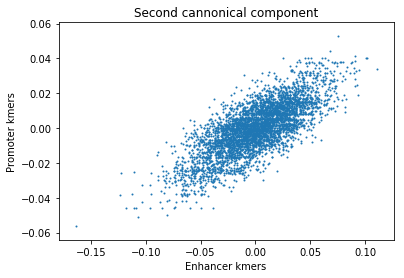

In [130]:
plt.scatter(atac_enh[:, 1], atac_prom[:, 1], s=1)
plt.xlabel('Enhancer kmers')
plt.ylabel('Promoter kmers')
plt.title('Second cannonical component')

Text(0.5,1,'First cannonical component')

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


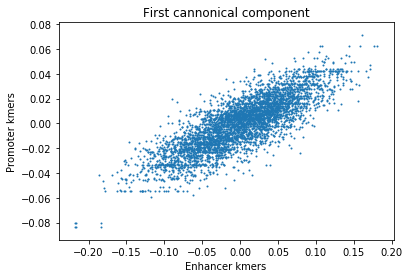

In [131]:
plt.scatter(atac_enh[:, 0], atac_prom[:, 0], s=1)
plt.xlabel('Enhancer kmers')
plt.ylabel('Promoter kmers')
plt.title('First cannonical component')

In [132]:
spearmanr(atac_enh[:, 0], atac_prom[:, 0])

SpearmanrResult(correlation=0.80818615443786346, pvalue=0.0)

In [133]:
atac_enhs.paired_gene.unique().shape

(1693,)

In [134]:
np.sum(pd.Series(use_enhs.paired_gene.unique()).isin(atac_enhs.paired_gene.unique()))

972

In [135]:
use_enh_array = use_enhs_atac.drop('paired_gene', axis=1).values
kmer_names = use_enhs_atac.columns.to_list()[:-1]
promoter_loadings = []
enhancer_loadings = []
for i in range(use_enh_array.shape[1]):
    enhancer_loadings.append(spearmanr(use_enh_array[:, i], atac_enh[:, 0])[0])
    promoter_loadings.append(spearmanr(use_promoter_atac[:, i], atac_prom[:, 0])[0])

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


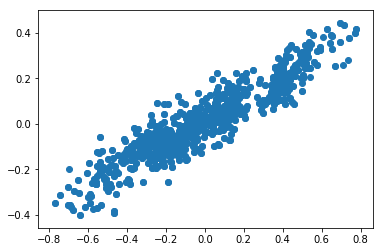

In [136]:
plt.scatter(enhancer_loadings, promoter_loadings)

In [137]:
spearmanr(enhancer_loadings, promoter_loadings)

SpearmanrResult(correlation=0.9190527890386494, pvalue=0.0)

## Fangming: debug gene expression matrix 